### Arbitrary value imputation
It consists of replacing NaN by an arbitrary value

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv',usecols=['Age', 'Fare', 'Survived'])
df.head()               

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
def impute_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    
     

<Axes: >

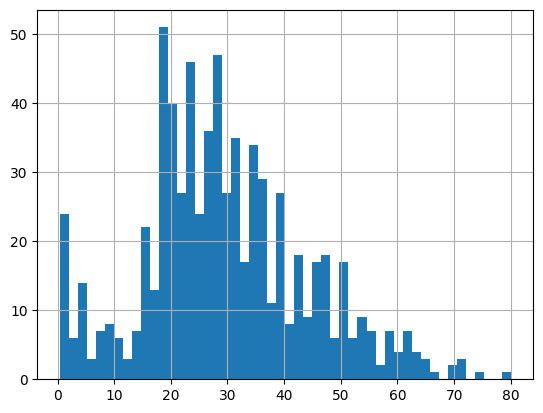

In [7]:
df['Age'].hist(bins=50)

### Arbitrary Values
It should not be more frequently present

### Advantages 
- Easy to implement 
- Captures the importance of missingness if there is one

### Disadvantages 
- Distorts the original distribution of the variable
- If missingness is not important , it mask the predictive power of the original variable by distortion
- Hard to decide which value to use

In [8]:
import pandas as pd

## How to handle categorical missing values

### Frequent Category Imputation

In [14]:
df=pd.read_csv('house_price.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [15]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
# Sales price is the dependent feature

In [17]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [20]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

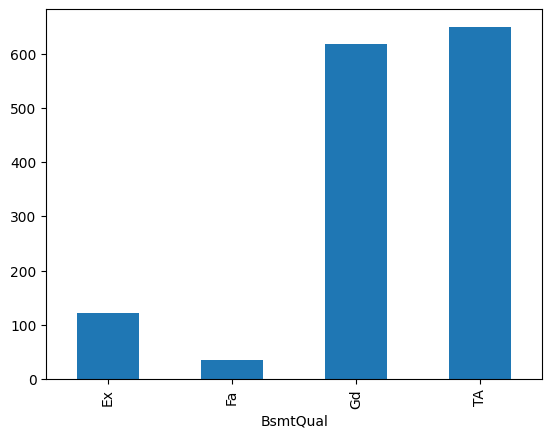

In [21]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()


<Axes: xlabel='BsmtQual'>

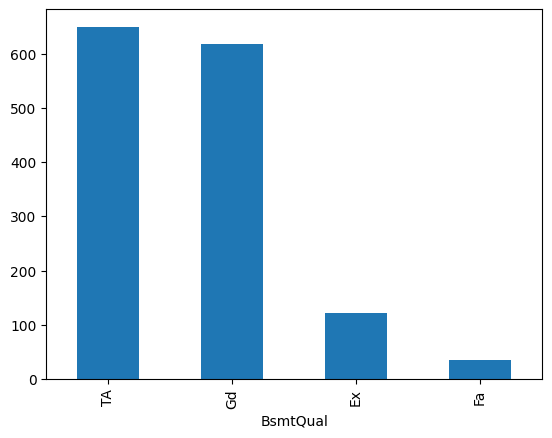

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [24]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

<Axes: xlabel='BsmtQual'>

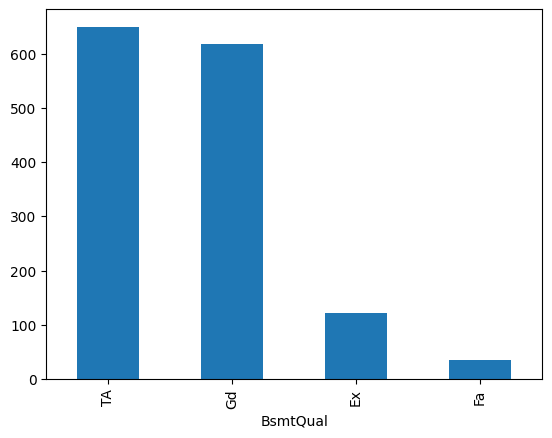

In [25]:
# this way is same as the above way(both are making ascending )
df['BsmtQual'].value_counts().plot.bar()


<Axes: xlabel='GarageType'>

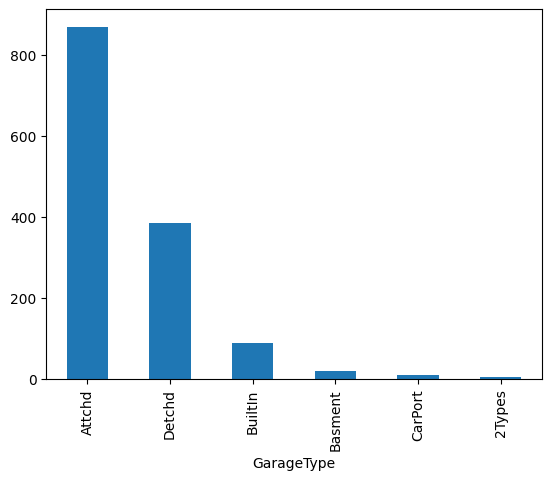

In [27]:
df['GarageType'].value_counts().plot.bar()


<Axes: xlabel='FireplaceQu'>

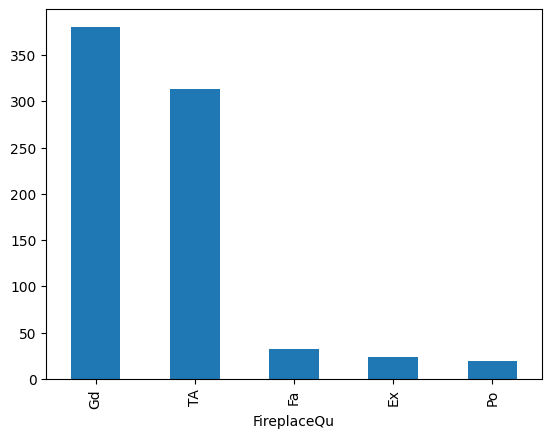

In [28]:
df['FireplaceQu'].value_counts().plot.bar()


In [30]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object', name='GarageType')

In [32]:
df['GarageType'].value_counts().index[0]



'Attchd'

In [33]:
## Imputing funtion
def impute_nan(df, variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [34]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [35]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [36]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [37]:
# instead above method we can also use mode for getting most frequent values
df['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [39]:
df['GarageType'].mode()[0]
# we can replace the first line of the impute nan function by this code. Then also we get the same answer


'Attchd'

### Advantages 
- It is easy to implement
- Faster way to implement

### Disadvantages
- Since we are using the most frequent labels, it may use them in an over represented way, if there are many nans
- It distorts the relationships between the most frequent labels

 ### Adding a variable to capture NAN

In [47]:
df=pd.read_csv('house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType'])

In [48]:
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [49]:
import numpy as np

In [50]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [51]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [52]:
most_frequent_value = df['BsmtQual'].mode()[0]

In [53]:
most_frequent_value

'TA'

In [54]:
df['BsmtQual'].fillna(most_frequent_value,inplace=True)

In [56]:
df

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0
...,...,...,...,...
1455,Gd,TA,Attchd,0
1456,Gd,TA,Attchd,0
1457,TA,Gd,Attchd,0
1458,TA,NaN,Attchd,0


In [57]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
BsmtQual_var      0
dtype: int64

In [63]:
# Here we have done that we have captured the importance of the missing variable and we have handled the missing value with the most frequent value
#  But we there a disadvantages for using this method in case of the variable 'FireplaceQu' since it contain more nan values

In [60]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [61]:
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [64]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,0,1
1,Gd,TA,Attchd,0,0
2,Gd,TA,Attchd,0,0
3,TA,Gd,Detchd,0,0
4,Gd,TA,Attchd,0,0


In [65]:
# Suppose if you have more frequent categories , we just replace the nan with a new category

In [66]:
df=pd.read_csv('house_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [67]:
def impute_nan(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),'Missing',df[variable])

In [68]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [69]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,Gd,Missing,Attchd
1,Gd,TA,Attchd,Gd,TA,Attchd
2,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Detchd,TA,Gd,Detchd
4,Gd,TA,Attchd,Gd,TA,Attchd


In [70]:
df=df.drop(columns=['BsmtQual','FireplaceQu','GarageType'],axis=1)
df

,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,Missing,Attchd


## How to handle categorical features

#### 1. One Hot Encoding

In [71]:
import pandas as pd

In [72]:
# don't use get dummies function in  case of sex

In [127]:
df = pd.read_csv('titanic.csv',usecols=['Sex'])

In [128]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [129]:
pd.get_dummies(df).head().astype(int)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [131]:
pd.get_dummies(df,drop_first=True).head().astype(int)

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [132]:
df = pd.read_csv('titanic.csv',usecols=['Embarked'])
df.head()


,Embarked
0,S
1,C
2,S
3,S
4,S


In [133]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [134]:
df.dropna(inplace=True)

In [135]:
df['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [136]:
# Now there is no nan values

In [139]:
pd.get_dummies(df,drop_first=True).head().astype(int)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### 2. One Hot Encoding with many categorical features

In [143]:
df = pd.read_csv('mercedes_benz.csv')
df.head()


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [144]:
df = pd.read_csv('mercedes_benz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [145]:
for i in df.columns:
    print(df[i].value_counts())

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64
X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: count, dtype: int64
X2
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
a

In [146]:
df['X0'].value_counts()

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64

In [148]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [152]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In this data set there are many features with many categories, So we need to consider only  the top ten categories here.

In [153]:
df.X1.value_counts().sort_values(ascending=False).head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [160]:
list_10=df.X1.value_counts().sort_values(ascending=False).head(10).index


In [161]:
# keyboard shortcut for making the markdown menu is '''Esc + m'''

In [162]:
# keyboard shortcut for making the code menu is '''Esc + y'''

In [163]:
for category in list_10:
    df[category] = np.where(df['X1']==category,1,0)

In [166]:
df[list_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0


In [169]:
index = pd.Index(['X1'])

In [172]:
list_10=list_10.append(index)

In [173]:
df[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
